<a href="https://colab.research.google.com/github/tigerak/1st_practice/blob/main/%EC%84%9C%ED%8F%AC%ED%8A%B8%EB%B2%A1%ED%84%B0%EB%A8%B8%EC%8B%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서포트 벡터 머신
- 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
- 클래스 사이의 경계에 위치한 데이터 포인트를 서포트벡터라고 함
- 각 서포트벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
각 서포트 벡터들 사이의 마진이 가장 큰 바향으로 학습
- 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측 수행

In [16]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from sklearn.svm import SVR, SVC # 회귀용 SVR, 분류용 SVC
from sklearn.datasets import load_boston, load_diabetes, load_iris, load_wine, load_breast_cancer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

SVR 회귀

In [2]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

Train Data Score : 0.2177283706374875
Test Data Score : 0.13544178468518187


svc 분류

In [3]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

Train Data Score : 0.9014084507042254
Test Data Score : 0.9230769230769231


## 커널 기법
- 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
- scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

In [4]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print('Linear Train Data Score : {}'.format(linear_svr.score(X_train, y_train)))
print('Linear Test Data Score : {}'.format(linear_svr.score(X_test, y_test)))

linear_svr = SVR(kernel='poly')
linear_svr.fit(X_train, y_train)

print('Polynomial Train Data Score : {}'.format(linear_svr.score(X_train, y_train)))
print('Polynomial Test Data Score : {}'.format(linear_svr.score(X_test, y_test)))

linear_svr = SVR(kernel='rbf')
linear_svr.fit(X_train, y_train)

print('RBF Train Data Score : {}'.format(linear_svr.score(X_train, y_train)))
print('RBF Test Data Score : {}'.format(linear_svr.score(X_test, y_test)))

Linear Train Data Score : 0.715506620496448
Linear Test Data Score : 0.6380398541506058
Polynomial Train Data Score : 0.2024454261446289
Polynomial Test Data Score : 0.133668450367462
RBF Train Data Score : 0.2177283706374875
RBF Test Data Score : 0.13544178468518187


In [5]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print('Linear Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('Linear Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

linear_svc = SVC(kernel='poly')
linear_svc.fit(X_train, y_train)

print('Polynomial Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('Polynomial Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

linear_svc = SVC(kernel='rbf')
linear_svc.fit(X_train, y_train)

print('RBF Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('RBF Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

Linear Train Data Score : 0.960093896713615
Linear Test Data Score : 0.986013986013986
Polynomial Train Data Score : 0.9014084507042254
Polynomial Test Data Score : 0.9230769230769231
RBF Train Data Score : 0.9014084507042254
RBF Test Data Score : 0.9230769230769231


## 매개변수 튜닝
- SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
- 매개변수를 변경하면서 성능 변화를 관찰

In [6]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
linear_svc.fit(X_train, y_train)

print('Polynomial Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('Polynomial Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

linear_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
linear_svc.fit(X_train, y_train)

print('RBF Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('RBF Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

Polynomial Train Data Score : 0.9835680751173709
Polynomial Test Data Score : 0.993006993006993
RBF Train Data Score : 0.9154929577464789
RBF Test Data Score : 0.9370629370629371


## 데이터 전처리

-SVM은 입력 데이터가 정규화되어야 좋은 성능을 보임
- 주도 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
- scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [9]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC()
linear_svc.fit(X_train, y_train)

print('SVC Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('SVC Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svc = SVC()
linear_svc.fit(X_train, y_train)

print('SVC StandardScaler전처리 Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('SVC StandardScaler전처리 Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svc = SVC()
linear_svc.fit(X_train, y_train)

print('SVC MinMaxScaler전처리 Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('SVC MinMaxScaler전처리 Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

SVC Train Data Score : 0.9014084507042254
SVC Test Data Score : 0.9230769230769231
SVC StandardScaler전처리 Train Data Score : 0.9835680751173709
SVC StandardScaler전처리 Test Data Score : 0.986013986013986
SVC MinMaxScaler전처리 Train Data Score : 0.9812206572769953
SVC MinMaxScaler전처리 Test Data Score : 0.986013986013986


# Linear SVR

## 보스턴 주택 가격

In [13]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print('Train Data Score : {}'.format(linear_svr.score(X_train, y_train)))
print('Test Data Score : {}'.format(linear_svr.score(X_test, y_test)))

Train Data Score : 0.691016501096553
Test Data Score : 0.7623420514498938


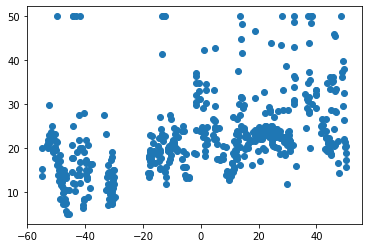

In [17]:
X_comp = TSNE(n_components=1).fit_transform(X) #서보트벡터는 차원을 늘려서 맵핑하기 떄문에 차원을 낮춰야 시각화 가능
plt.scatter(X_comp, y);

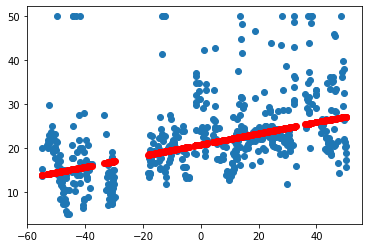

In [19]:
linear_svr.fit(X_comp, y)
predict = linear_svr.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [20]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.02913499, 0.02862   , 0.02712345, 0.02741718, 0.0253911 ]),
 'score_time': array([0.00224686, 0.00218034, 0.00223088, 0.00211358, 0.00138783]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [22]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01], \
               'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamm

In [23]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)